In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/Users/raghuvir/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

## Dimension of Data

In [3]:
df.shape

(103, 7)

## How does the Data look like?

In [4]:
df.head()  
# can use df.sample()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## What is the datatype of columns?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [6]:
## here there is mistake in production tons and ppp kg and all as it is showing all as object which is bad
## for statistical (numerical) point of view

## Missing values / null values

In [7]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

## How does the data look Mathematically?

In [8]:
df.describe()
## here unnamed is of no use bcoz its just serial number

,Unnamed: 0
count,103.000000
mean,51.000000
std,29.877528
min,0.000000
25%,25.500000
50%,51.000000
75%,76.500000
max,102.000000


## Duplicate Values?

In [9]:
df.duplicated().sum()

0

## How many unique values are there in every column?

In [10]:
df.nunique()


Unnamed: 0                    103
Country                       103
Continent                       6
Production (Tons)             103
Production per Person (Kg)    102
Acreage (Hectare)             102
Yield (Kg / Hectare)          102
dtype: int64

In [11]:
df["Continent"].unique()

array(['South America', 'Asia', 'North America', 'Oceania', 'Africa',
       'Europe'], dtype=object)

## Are there any outliers in numerical columns?

<Axes: >

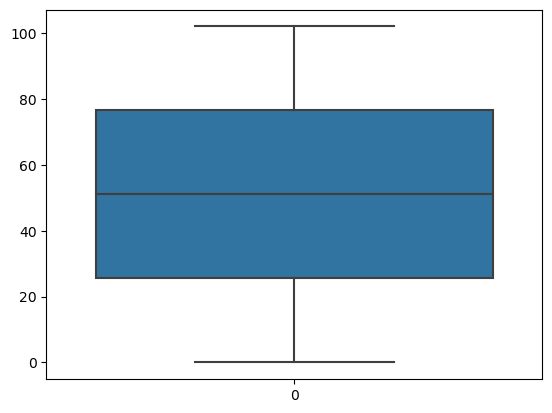

In [12]:
sns.boxplot(df["Unnamed: 0"])
## only this is numerical here as of now

# DATA CLEANING 

In [13]:
df.head()


,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## error dealing

In [14]:
##error in production
df["Production (Tons)"]= df["Production (Tons)"].str.replace(".","")
#replaced dot with nothing
df["Production per Person (Kg)"]= df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"]= df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [15]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


## dealing with null values

In [16]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [17]:
df["Acreage (Hectare)" ].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
98     False
99      True
100    False
101    False
102    False
Name: Acreage (Hectare), Length: 103, dtype: bool

In [18]:
## use one more df outside to filter all the rows rather than true false
df[df["Acreage (Hectare)" ].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [19]:
df= df.dropna().reset_index()

In [20]:
df.head()

,index,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [21]:
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [22]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


## bringing some mathematics 

In [23]:
df.info() ##can use df.dtypes no bracket since it is attribute(property, characteristics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     102 non-null    object
 1   Continent                   102 non-null    object
 2   Production (Tons)           102 non-null    object
 3   Production per Person (Kg)  102 non-null    object
 4   Acreage (Hectare)           102 non-null    object
 5   Yield (Kg / Hectare)        102 non-null    object
dtypes: object(6)
memory usage: 4.9+ KB


In [24]:
df["Production (Tons)"]= df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"]= df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"]= df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].astype(float)

In [25]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

# ANALYSIS PART

## Univariate Analysis

In [26]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## How many countries produce sugarcane from each continent?

In [27]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

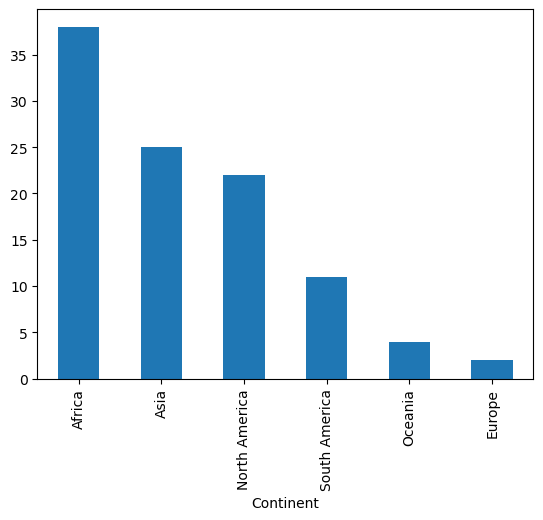

In [28]:
df["Continent"].value_counts().plot(kind="bar")

In [29]:
##replacing column name (for ease)
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [30]:
df.rename(columns={'Production (Tons)': 'production_tons','Production per Person (Kg)':'ppp_kg',
                   'Acreage (Hectare)':'area_hectare','Yield (Kg / Hectare)':'yield'}, inplace=True)

In [31]:
df.head()

,Country,Continent,production_tons,ppp_kg,area_hectare,yield
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [32]:
df.describe()

,production_tons,ppp_kg,area_hectare,yield
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


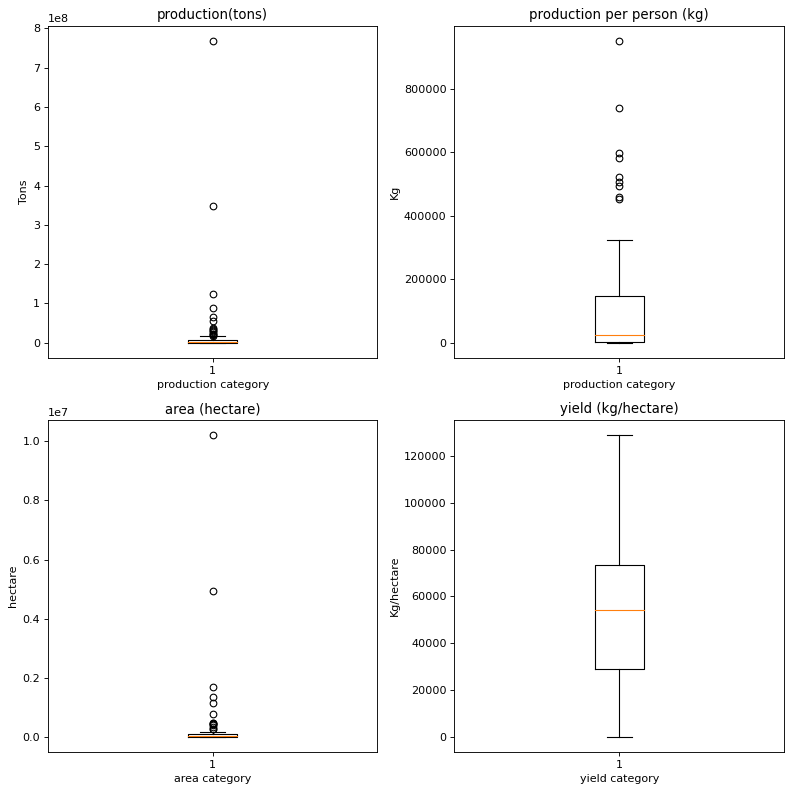

In [33]:
%matplotlib inline
plt.figure(figsize=(10,10),dpi=80)
plt.subplot(2,2,1)
plt.boxplot(df["production_tons"])
plt.title("production(tons)")
plt.ylabel("Tons")
plt.xlabel("production category")

plt.subplot(2,2,2)
plt.boxplot(df["ppp_kg"])
plt.title("production per person (kg)")
plt.ylabel("Kg")
plt.xlabel("production category")

plt.subplot(2,2,3)
plt.boxplot(df["area_hectare"])
plt.title("area (hectare)")
plt.ylabel("hectare")
plt.xlabel("area category")

plt.subplot(2,2,4)
plt.boxplot(df["yield"])
plt.title("yield (kg/hectare)")
plt.ylabel("Kg/hectare")
plt.xlabel("yield category")

plt.tight_layout()



Text(0, 0.5, 'continents category')

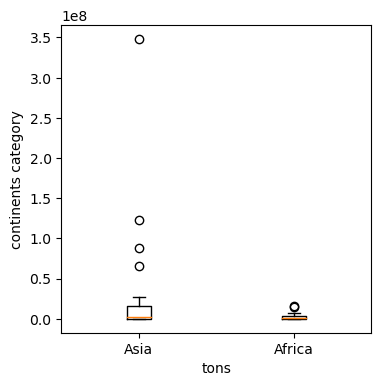

In [34]:
## category making in box plot
plt.figure(figsize=(4, 4))
plt.boxplot([
    df[df['Continent'] == 'Asia']['production_tons'],
    df[df['Continent'] == 'Africa']['production_tons']
    ],
            labels=['Asia', 'Africa'])
plt.xlabel("tons")
plt.ylabel("continents category")

## Distribution of columns

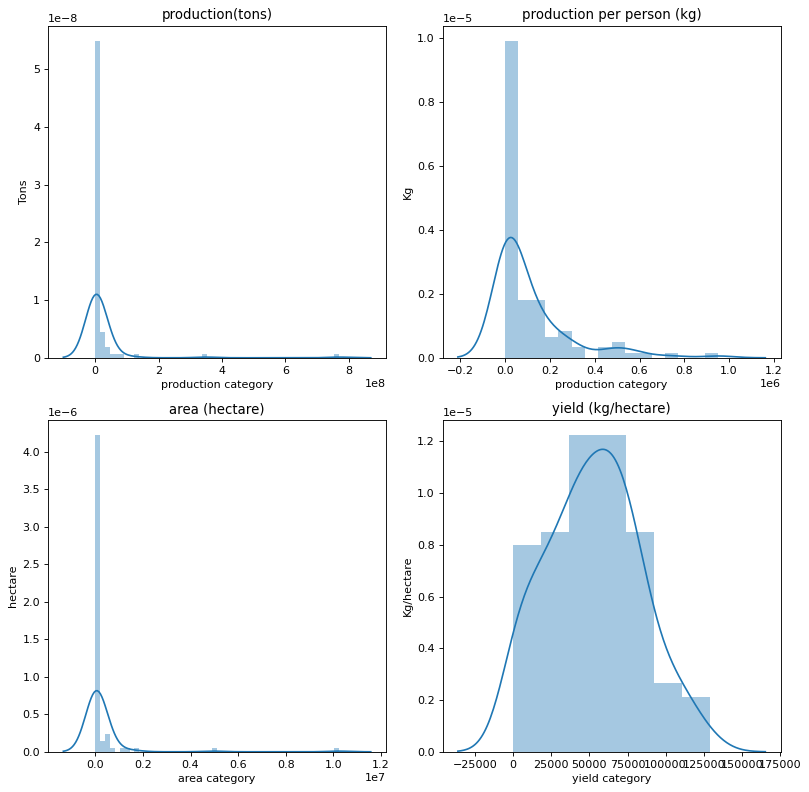

In [35]:
%matplotlib inline
plt.figure(figsize=(10,10),dpi=80)
plt.subplot(2,2,1)
sns.distplot(df["production_tons"])
plt.title("production(tons)")
plt.ylabel("Tons")
plt.xlabel("production category")

plt.subplot(2,2,2)
sns.distplot(df["ppp_kg"])
plt.title("production per person (kg)")
plt.ylabel("Kg")
plt.xlabel("production category")

plt.subplot(2,2,3)
sns.distplot(df["area_hectare"])
plt.title("area (hectare)")
plt.ylabel("hectare")
plt.xlabel("area category")

plt.subplot(2,2,4)
sns.distplot(df["yield"])
plt.title("yield (kg/hectare)")
plt.ylabel("Kg/hectare")
plt.xlabel("yield category")

plt.tight_layout()



# BIVARIATE ANALYSIS

In [36]:
df.head()

,Country,Continent,production_tons,ppp_kg,area_hectare,yield
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [37]:
df1=df.copy()


In [38]:
df1.set_index("Country",drop=True,inplace=True)

In [39]:
df1

,Continent,production_tons,ppp_kg,area_hectare,yield
Country,,,,,
Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
India,Asia,348448000.0,260721.000,4950000.0,70393.5
China,Asia,123059739.0,88287.000,1675215.0,73459.1
Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...
Spain,Europe,394.0,8.000,9.0,43596.5
Lebanon,Asia,97.0,16.000,3.0,28386.4
Singapore,Asia,50.0,9.000,2.0,25.0


### which country produces maximum sugarcane

In [40]:

df_new= df[["Country","production_tons"]]

In [41]:
df_new.set_index("Country", inplace=True)
## to remove those 0,1,2,3...

<Axes: ylabel='production_tons'>

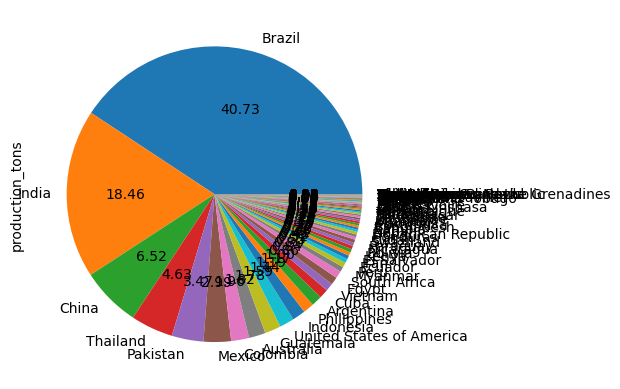

In [42]:
df_new["production_tons"].plot(kind="pie",autopct="%0.2f")

Text(0, 0.5, 'production in tons')

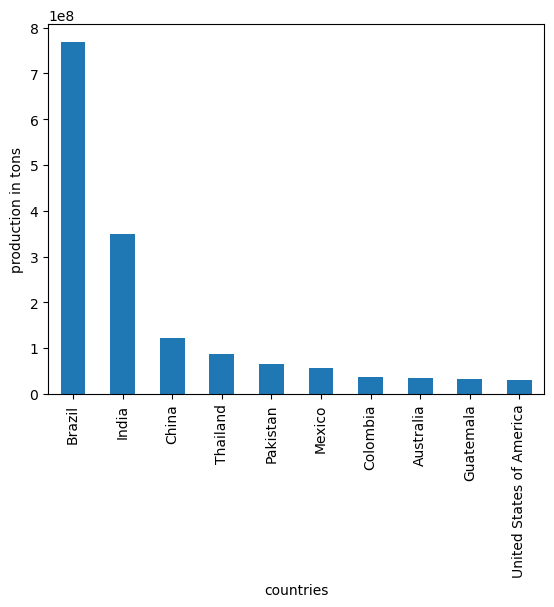

In [43]:
df_new["production_tons"].head(10).plot(kind="bar")
plt.xlabel("countries")
plt.ylabel("production in tons")

In [44]:
##Highest sugarcane is produced by Brazil followed by India and China

### Top countries with highest land?

Text(0, 0.5, 'area in hectare')

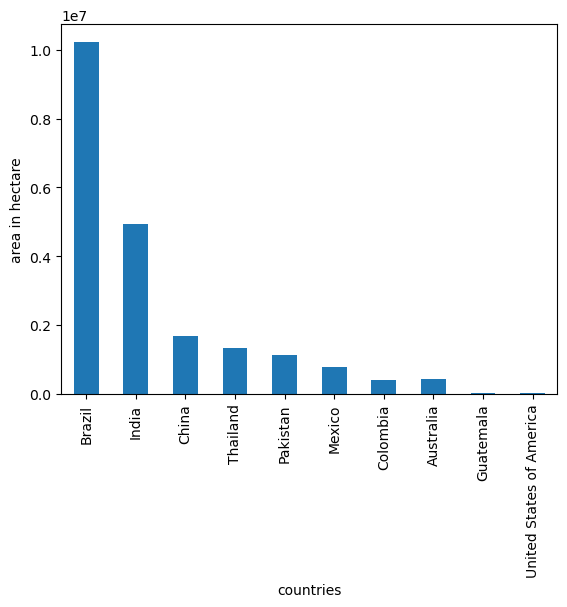

In [45]:
df1["area_hectare"].head(10).plot(kind="bar")
plt.xlabel("countries")
plt.ylabel("area in hectare")
# problem: not sorted

In [46]:
df1

,Continent,production_tons,ppp_kg,area_hectare,yield
Country,,,,,
Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
India,Asia,348448000.0,260721.000,4950000.0,70393.5
China,Asia,123059739.0,88287.000,1675215.0,73459.1
Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...
Spain,Europe,394.0,8.000,9.0,43596.5
Lebanon,Asia,97.0,16.000,3.0,28386.4
Singapore,Asia,50.0,9.000,2.0,25.0


Text(0, 0.5, 'area in hectare')

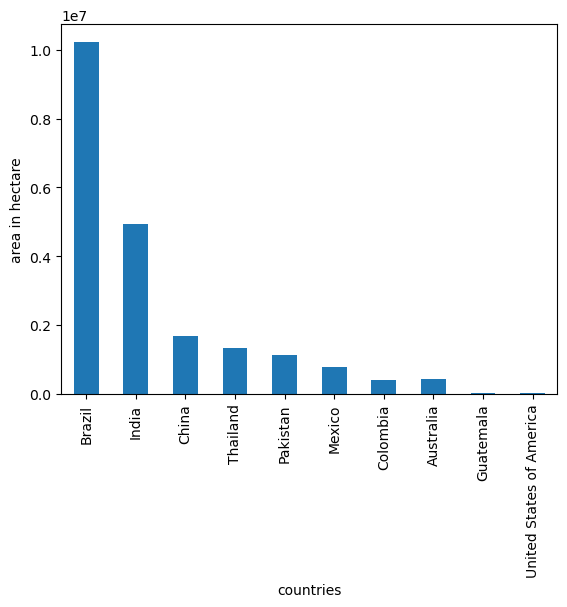

In [47]:
df1.sort_values(by="Country",ascending=False)
df1["area_hectare"].head(10).plot(kind="bar")
plt.xlabel("countries")
plt.ylabel("area in hectare")

### which country has highest yield?

Text(0, 0.5, 'yield (kg/hectare)')

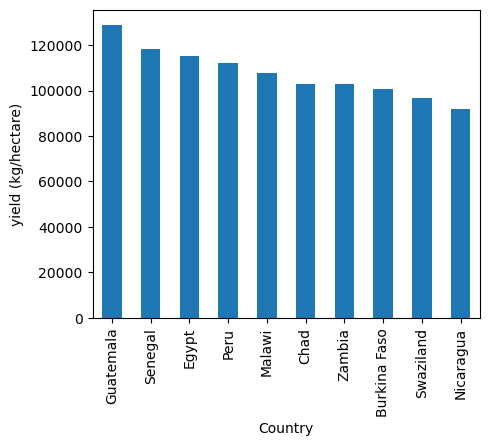

In [48]:
plt.figure(figsize=(5,4))
df1=df1.sort_values("yield",ascending=False)
df1["yield"].head(10).plot(kind="bar",x="countries")
plt.ylabel("yield (kg/hectare)")

### correlation

In [49]:
df

,Country,Continent,production_tons,ppp_kg,area_hectare,yield
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


In [50]:
df2= df.select_dtypes(include=[float,int])

In [51]:
df2

,production_tons,ppp_kg,area_hectare,yield
0,768678382.0,3668.531,10226205.0,75167.5
1,348448000.0,260721.000,4950000.0,70393.5
2,123059739.0,88287.000,1675215.0,73459.1
3,87468496.0,1264.303,1336575.0,65442.2
4,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...
97,394.0,8.000,9.0,43596.5
98,97.0,16.000,3.0,28386.4
99,50.0,9.000,2.0,25.0
100,12.0,6.000,1.0,11949.8


In [52]:
# closer to 1 they are positively correlated 
# production ton is related to area_hectare very much
df2.corr()

,production_tons,ppp_kg,area_hectare,yield
production_tons,1.000000,0.015000,0.997550,0.132812
ppp_kg,0.015000,1.000000,0.012557,0.017999
area_hectare,0.997550,0.012557,1.000000,0.113433
yield,0.132812,0.017999,0.113433,1.000000


<Axes: >

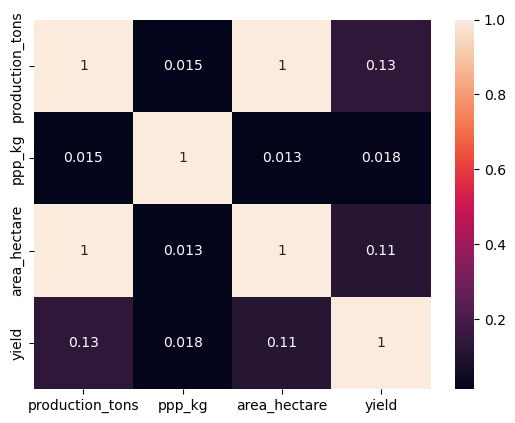

In [53]:
sns.heatmap(df2.corr(), annot=True)
#annot is used to show annotations(values) inside cell

### Do countries with Highest Land produce more sugarcane?

Text(0, 0.5, 'production in tons')

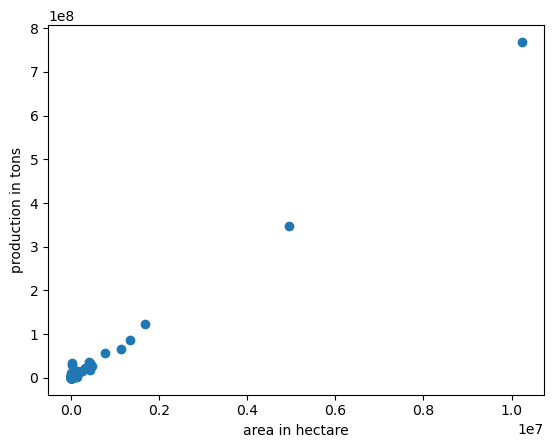

In [54]:
#clear from heat map that it is true
#can also show it using scatter plot
plt.scatter(x=df["area_hectare"],y=df["production_tons"])
plt.xlabel("area in hectare")
plt.ylabel("production in tons") 

# ANALYSIS FOR CONTINENT

In [55]:
df_continent = df.groupby("Continent").sum()
df_continent = df_continent.drop(columns=["Country"])

In [56]:
df_continent

,production_tons,ppp_kg,area_hectare,yield
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


### Which continent produces maximum sugarcane?

In [57]:
df_continent=df_continent.sort_values(by="production_tons", ascending=False)

<Axes: xlabel='Continent'>

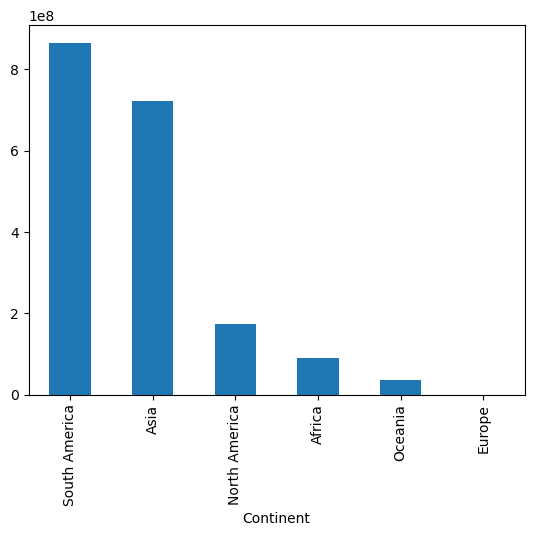

In [58]:
df_continent["production_tons"].plot(kind="bar")

### Do number of countries in continent affect production of sugarcane?

In [59]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [60]:
# Africa have 38 countries(highest) but not the top one to produce sugarcane
# Ans: No
# lets do it graphically using scatter plot

In [61]:
df_continent["no_of_countries"]= df.groupby("Continent").count()["Country"]

In [62]:
df_continent

,production_tons,ppp_kg,area_hectare,yield,no_of_countries
Continent,,,,,
South America,865588126.0,3505531.738,11369236.0,677192.7,11
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Oceania,36177574.0,28593.605,490909.0,162419.1,4
Europe,5823.0,536.000,71.0,131870.9,2


<Axes: xlabel='no_of_countries', ylabel='production_tons'>

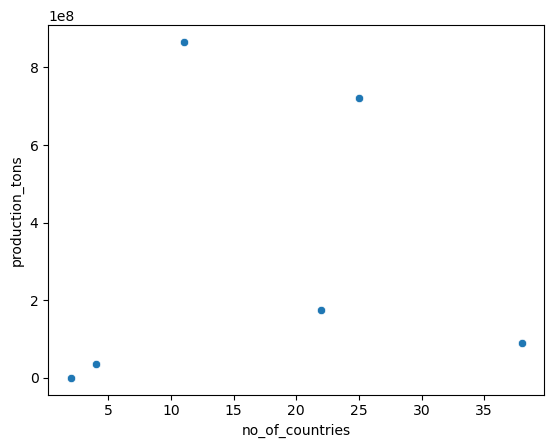

In [63]:

sns.scatterplot(data=df_continent, x = "no_of_countries", y= "production_tons")

### Production distribution by continent

<Axes: ylabel='production_tons'>

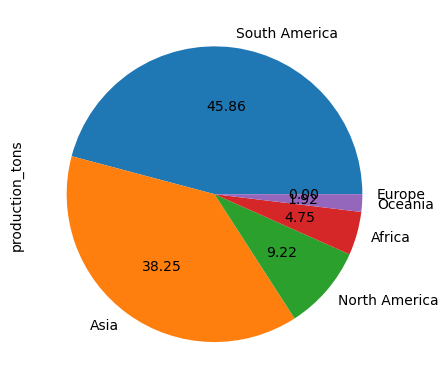

In [64]:
df_continent["production_tons"].plot(kind="pie", autopct="%0.2f")

### Correlation for continent

In [65]:
df_continent.corr()

,production_tons,ppp_kg,area_hectare,yield,no_of_countries
production_tons,1.000000,0.522211,0.994897,0.091201,0.109244
ppp_kg,0.522211,1.000000,0.463215,0.542961,0.540086
area_hectare,0.994897,0.463215,1.000000,0.111166,0.132817
yield,0.091201,0.542961,0.111166,1.000000,0.989712
no_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: >

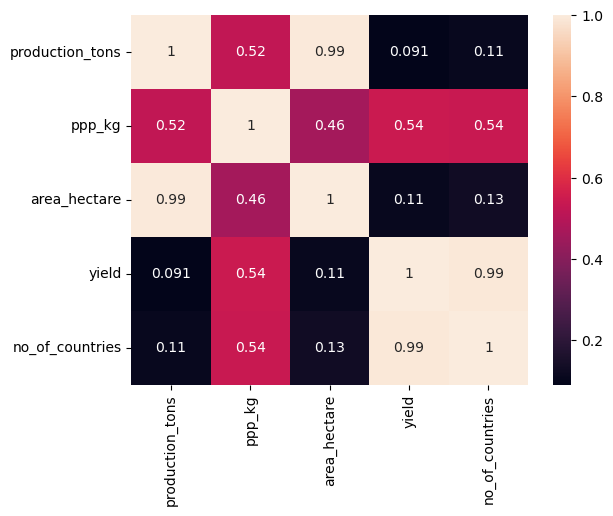

In [66]:
sns.heatmap(df_continent.corr(), annot=True)

# END ...